In [29]:
import pm4py
import statistics

In [30]:
file_path = '/Users/nick/BPPSO/BPI Challenge 2017.xes'
log_concrete = pm4py.read_xes(file_path, return_legacy_log_object=True)

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [31]:
from collections import Counter

#Trace related
variants = set()
cases = set()
trace_lengths = []


#Trace attributes related
loanGoals = Counter()
applicationTypes = Counter()
requestedAmounts = Counter()

#Event related
events = set()

#Time related
trace_times = []


In [32]:
for trace in log_concrete:
    event_in_trace = []

    # Trace attribute related
    cases.add(trace.attributes["concept:name"])
    loanGoals[trace.attributes["LoanGoal"]] += 1
    applicationTypes[trace.attributes["ApplicationType"]] += 1
    requestedAmounts[trace.attributes["RequestedAmount"]] += 1
    
    # Event related
    for event in trace: 
        event_in_trace.append(event["concept:name"])
        events.add(event["concept:name"]) 
    
    variant = tuple(event_in_trace)
    variants.add(variant)
    
    trace_lengths.append(len(trace))
    duration_obj = trace[-1]['time:timestamp'] - trace[0]['time:timestamp']
    trace_times.append(duration_obj.total_seconds())


### Trace related analysis

In [33]:
print("Number of cases:", len(cases))
print("Number of variants:", len(variants))

print("Number of distinct LoanGoals:", len(loanGoals))
print("Number of distinct ApplicationType:", len(applicationTypes))
print("Number of distinct RequestedAmount:", len(requestedAmounts))

print("LoanGoal frequencies:", loanGoals)
print("ApplicationType frequencies:", applicationTypes)

Number of cases: 31509
Number of variants: 15930
Number of distinct LoanGoals: 14
Number of distinct ApplicationType: 2
Number of distinct RequestedAmount: 701
LoanGoal frequencies: Counter({'Car': 9328, 'Home improvement': 7669, 'Existing loan takeover': 5601, 'Other, see explanation': 2985, 'Unknown': 2365, 'Not speficied': 1065, 'Remaining debt home': 842, 'Extra spending limit': 625, 'Caravan / Camper': 369, 'Motorcycle': 275, 'Boat': 201, 'Tax payments': 152, 'Business goal': 30, 'Debt restructuring': 2})
ApplicationType frequencies: Counter({'New credit': 28120, 'Limit raise': 3389})


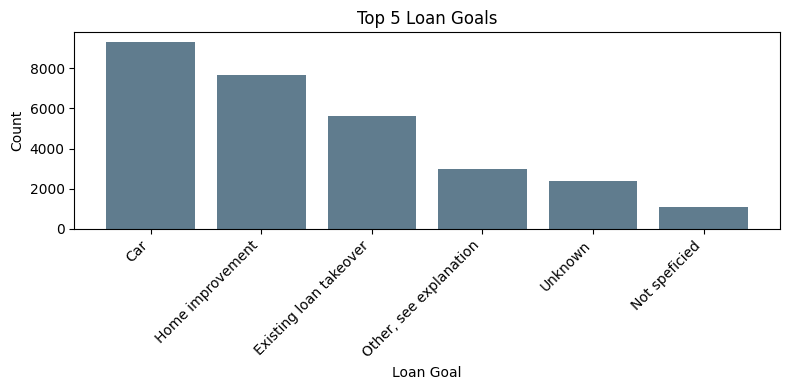

In [46]:
import matplotlib.pyplot as plt

# Sort loanGoals by count (value) in descending order
sorted_items = sorted(loanGoals.items(), key=lambda x: x[1], reverse=True)

# Select the top 5
top5 = sorted_items[:6]

labels = [item[0] for item in top5]
counts = [item[1] for item in top5]

plt.figure(figsize=(8,4))
plt.bar(labels, counts, color='#607c8e')
plt.xticks(rotation=45, ha='right')
plt.title("Top 5 Loan Goals")
plt.xlabel("Loan Goal")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig('/Users/nick/BPPSO/figures/LoanGoal_Frequency.png', dpi=300)
plt.show()


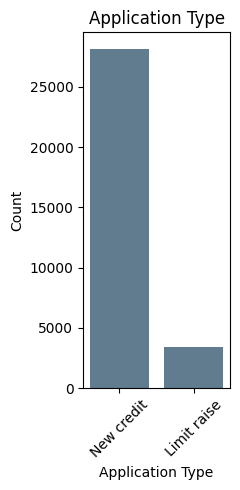

In [47]:
labels = list(applicationTypes.keys())
counts = list(applicationTypes.values())

plt.figure(figsize=(2.5, 5))
plt.bar(labels, counts, color = '#607c8e')
plt.xticks(rotation=45)
plt.title("Application Type")
plt.xlabel("Application Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('/Users/nick/BPPSO/figures/Application_Type_Frequency.png',dpi = 300)
plt.show()


In [36]:
max_len = max(trace_lengths)
min_len = min(trace_lengths)
avg_len = sum(trace_lengths) / len(trace_lengths)
std_len = statistics.stdev(trace_lengths)

print(f"Max trace length: {max_len} events")
print(f"Min trace length: {min_len} events")
print(f"Average trace length: {avg_len:.2f} events")
print(f"Standard deviation length: {std_len} events")

Max trace length: 180 events
Min trace length: 10 events
Average trace length: 38.16 events
Standard deviation length: 16.715308056564382 events


### Event related

In [37]:
number_events = sum(trace_lengths)
unique_event = len(events)

print(f"Total number of events: {number_events} events")
print("Number of unique event types:", len(events))


Total number of events: 1202267 events
Number of unique event types: 26


### Time related

In [38]:
def format_duration(total_seconds):
    
    # Round the seconds to the nearest whole number first
    total_seconds = round(total_seconds)
    
    # Calculate days and the remaining seconds
    days, remaining_seconds = divmod(total_seconds, 86400)
    
    # Calculate hours from the remainder
    hours, remaining_seconds = divmod(remaining_seconds, 3600)
    
    # Calculate minutes and seconds from the new remainder
    minutes, seconds = divmod(remaining_seconds, 60)
    
    # Return the formatted string (casting to int to remove any decimals)
    return f"{int(days)} days {int(hours)} hours {int(minutes)} minutes {int(seconds)} seconds"

In [39]:

max_time = max(trace_times)
min_time = min(trace_times)  
avg_time = sum(trace_times) / len(trace_lengths)
stdev_time = statistics.stdev(trace_times)


print(f"Max Duration: {format_duration(max_time)}")
print(f"Min Duration: {format_duration(min_time)}")
print(f"Mean Duration: {format_duration(avg_time)}")
print(f"Standard deviation Duration: {format_duration(stdev_time)}")

Max Duration: 286 days 1 hours 44 minutes 19 seconds
Min Duration: 0 days 0 hours 3 minutes 21 seconds
Mean Duration: 21 days 21 hours 35 minutes 26 seconds
Standard deviation Duration: 13 days 4 hours 3 minutes 42 seconds
